In [1]:
import myosuite
import gym
import os
os.environ['MUJOCO_GL'] = 'egl'
import numpy as np
import matplotlib.pyplot as plt
import skvideo
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

MyoSuite:> Registering Myo Envs


    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warning: NEEDS EXTENSION: falling back to kms_swrast


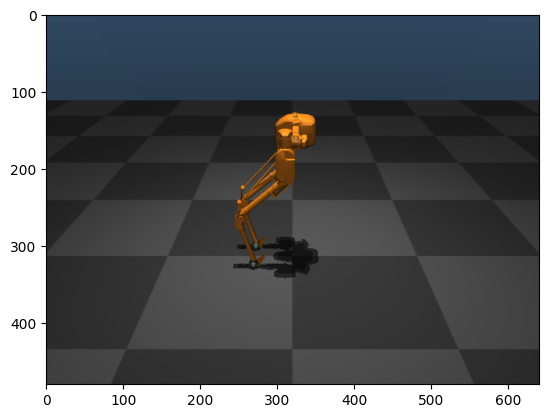

In [2]:
env_tes = gym.make('CassieWalk-v0')

frame = env_tes.env.sim.renderer.render_offscreen(camera_id=0)
plt.imshow(frame)

In [3]:
# trainCassie.py

import myosuite
import gym
import gymnasium
from gymnasium import register
from stable_baselines3.common.env_checker import check_env

register('CassieWrapper-v0', entry_point='myosuite.envs.myo.myobase.SB3:CassieWrapper',
            max_episode_steps=1000,
        )

models_dir = "models/TD3"
logdir = "logs"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)
train_env = gymnasium.make('CassieWrapper-v0')

In [4]:
check_env(train_env)
#train_env.reset(seed=0)

In [5]:
from stable_baselines3 import SAC
from stable_baselines3 import TD3
import gymnasium as gym
from tqdm import tqdm  # Import tqdm for the progress bar

# Setup the environment and directories for logging and model saving
train_env = gym.make('CassieWrapper-v0')
logdir = "logs"
models_dir = "models/TD3"
TIMESTEPS = 20000  # Number of timesteps per iteration
TOTAL_TIMESTEPS = 2000000  # Total number of timesteps
#TIMESTEPS = 20000
#TOTAL_TIMESTEPS = 20000
iterations = TOTAL_TIMESTEPS // TIMESTEPS  # Calculate the number of iterations needed

# Initialize the SAC model
model = TD3('MlpPolicy', train_env, verbose=1, tensorboard_log=logdir)

# Training loop with a progress bar
for i in tqdm(range(1, iterations + 1), desc="Training Progress"):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="TD3")
    model.save(f"{models_dir}/{TIMESTEPS * i}")

# Close the environment after training
train_env.close()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Training Progress:   0%|                                                                        | 0/100 [00:00<?, ?it/s]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.8     |
|    ep_rew_mean     | 14.1     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 59       |
|    time_elapsed    | 2        |
|    total_timesteps | 167      |
| train/             |          |
|    actor_loss      | -0.452   |
|    critic_loss     | 0.00395  |
|    learning_rate   | 0.001    |
|    n_updates       | 66       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.4     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 54       |
|    time_elapsed    | 5        |
|    total_timesteps | 323      |
| train/             |          |
|    actor_loss      | -0.616   |
|    critic_loss     | 0.0141   |
|    learning_rate   | 0.001    |
|    n_updates       | 222

Training Progress:   1%|▌                                                            | 1/100 [05:11<8:33:30, 311.22s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.3     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 504      |
|    fps             | 83       |
|    time_elapsed    | 0        |
|    total_timesteps | 20003    |
| train/             |          |
|    actor_loss      | -1.75    |
|    critic_loss     | 0.0274   |
|    learning_rate   | 0.001    |
|    n_updates       | 19902    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.3     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 508      |
|    fps             | 105      |
|    time_elapsed    | 1        |
|    total_timesteps | 20167    |
| train/             |          |
|    actor_loss      | -1.81    |
|    critic_loss     | 0.0309   |
|    learning_rate   | 0.001    |
|    n_updates       | 200

Training Progress:   2%|█▏                                                           | 2/100 [08:32<6:42:29, 246.42s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 1044     |
|    fps             | 76       |
|    time_elapsed    | 1        |
|    total_timesteps | 40106    |
| train/             |          |
|    actor_loss      | -1.54    |
|    critic_loss     | 0.0285   |
|    learning_rate   | 0.001    |
|    n_updates       | 40005    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 1048     |
|    fps             | 92       |
|    time_elapsed    | 2        |
|    total_timesteps | 40258    |
| train/             |          |
|    actor_loss      | -1.71    |
|    critic_loss     | 0.0328   |
|    learning_rate   | 0.001    |
|    n_updates       | 401

Training Progress:   3%|█▊                                                           | 3/100 [11:58<6:09:02, 228.27s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 1568     |
|    fps             | 94       |
|    time_elapsed    | 1        |
|    total_timesteps | 60143    |
| train/             |          |
|    actor_loss      | -1.81    |
|    critic_loss     | 0.0271   |
|    learning_rate   | 0.001    |
|    n_updates       | 60042    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.4     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 1572     |
|    fps             | 94       |
|    time_elapsed    | 3        |
|    total_timesteps | 60295    |
| train/             |          |
|    actor_loss      | -1.83    |
|    critic_loss     | 0.0273   |
|    learning_rate   | 0.001    |
|    n_updates       | 601

Training Progress:   4%|██▍                                                          | 4/100 [15:33<5:56:31, 222.83s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 2088     |
|    fps             | 86       |
|    time_elapsed    | 0        |
|    total_timesteps | 80071    |
| train/             |          |
|    actor_loss      | -1.93    |
|    critic_loss     | 0.0307   |
|    learning_rate   | 0.001    |
|    n_updates       | 79970    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 2092     |
|    fps             | 83       |
|    time_elapsed    | 2        |
|    total_timesteps | 80224    |
| train/             |          |
|    actor_loss      | -1.9     |
|    critic_loss     | 0.0259   |
|    learning_rate   | 0.001    |
|    n_updates       | 801

Training Progress:   5%|███                                                          | 5/100 [19:20<5:55:12, 224.34s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 2612     |
|    fps             | 111      |
|    time_elapsed    | 1        |
|    total_timesteps | 100120   |
| train/             |          |
|    actor_loss      | -1.88    |
|    critic_loss     | 0.0356   |
|    learning_rate   | 0.001    |
|    n_updates       | 100019   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 2616     |
|    fps             | 91       |
|    time_elapsed    | 2        |
|    total_timesteps | 100272   |
| train/             |          |
|    actor_loss      | -1.88    |
|    critic_loss     | 0.0246   |
|    learning_rate   | 0.001    |
|    n_updates       | 100

Training Progress:   6%|███▋                                                         | 6/100 [22:39<5:37:57, 215.72s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 3128     |
|    fps             | 107      |
|    time_elapsed    | 0        |
|    total_timesteps | 120067   |
| train/             |          |
|    actor_loss      | -1.78    |
|    critic_loss     | 0.0327   |
|    learning_rate   | 0.001    |
|    n_updates       | 119966   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 3132     |
|    fps             | 107      |
|    time_elapsed    | 2        |
|    total_timesteps | 120223   |
| train/             |          |
|    actor_loss      | -1.81    |
|    critic_loss     | 0.0304   |
|    learning_rate   | 0.001    |
|    n_updates       | 120

Training Progress:   7%|████▎                                                        | 7/100 [26:11<5:32:21, 214.43s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 3640     |
|    fps             | 99       |
|    time_elapsed    | 0        |
|    total_timesteps | 140006   |
| train/             |          |
|    actor_loss      | -1.9     |
|    critic_loss     | 0.0276   |
|    learning_rate   | 0.001    |
|    n_updates       | 139905   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 3644     |
|    fps             | 98       |
|    time_elapsed    | 1        |
|    total_timesteps | 140162   |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0254   |
|    learning_rate   | 0.001    |
|    n_updates       | 140

Training Progress:   8%|████▉                                                        | 8/100 [29:50<5:31:17, 216.06s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42       |
|    ep_rew_mean     | 14.3     |
| time/              |          |
|    episodes        | 4132     |
|    fps             | 93       |
|    time_elapsed    | 1        |
|    total_timesteps | 160109   |
| train/             |          |
|    actor_loss      | -1.87    |
|    critic_loss     | 0.028    |
|    learning_rate   | 0.001    |
|    n_updates       | 160008   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42       |
|    ep_rew_mean     | 14.3     |
| time/              |          |
|    episodes        | 4136     |
|    fps             | 75       |
|    time_elapsed    | 3        |
|    total_timesteps | 160273   |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0261   |
|    learning_rate   | 0.001    |
|    n_updates       | 160

Training Progress:   9%|█████▍                                                       | 9/100 [33:36<5:32:19, 219.11s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 4596     |
|    fps             | 99       |
|    time_elapsed    | 1        |
|    total_timesteps | 180105   |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0311   |
|    learning_rate   | 0.001    |
|    n_updates       | 180004   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 4600     |
|    fps             | 99       |
|    time_elapsed    | 2        |
|    total_timesteps | 180285   |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.0336   |
|    learning_rate   | 0.001    |
|    n_updates       | 180

Training Progress:  10%|██████                                                      | 10/100 [37:03<5:23:02, 215.36s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 5040     |
|    fps             | 106      |
|    time_elapsed    | 0        |
|    total_timesteps | 200085   |
| train/             |          |
|    actor_loss      | -2.12    |
|    critic_loss     | 0.0304   |
|    learning_rate   | 0.001    |
|    n_updates       | 199984   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 5044     |
|    fps             | 103      |
|    time_elapsed    | 2        |
|    total_timesteps | 200265   |
| train/             |          |
|    actor_loss      | -2.15    |
|    critic_loss     | 0.0309   |
|    learning_rate   | 0.001    |
|    n_updates       | 200

Training Progress:  11%|██████▌                                                     | 11/100 [40:45<5:22:14, 217.24s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 5484     |
|    fps             | 97       |
|    time_elapsed    | 0        |
|    total_timesteps | 220065   |
| train/             |          |
|    actor_loss      | -2.17    |
|    critic_loss     | 0.0299   |
|    learning_rate   | 0.001    |
|    n_updates       | 219964   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 5488     |
|    fps             | 94       |
|    time_elapsed    | 2        |
|    total_timesteps | 220245   |
| train/             |          |
|    actor_loss      | -2.05    |
|    critic_loss     | 0.03     |
|    learning_rate   | 0.001    |
|    n_updates       | 220

Training Progress:  12%|███████▏                                                    | 12/100 [44:12<5:14:16, 214.28s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 5928     |
|    fps             | 82       |
|    time_elapsed    | 0        |
|    total_timesteps | 240045   |
| train/             |          |
|    actor_loss      | -2.19    |
|    critic_loss     | 0.034    |
|    learning_rate   | 0.001    |
|    n_updates       | 239944   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 5932     |
|    fps             | 85       |
|    time_elapsed    | 2        |
|    total_timesteps | 240225   |
| train/             |          |
|    actor_loss      | -2.19    |
|    critic_loss     | 0.0255   |
|    learning_rate   | 0.001    |
|    n_updates       | 240

Training Progress:  13%|███████▊                                                    | 13/100 [47:40<5:07:59, 212.41s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.3     |
| time/              |          |
|    episodes        | 6372     |
|    fps             | 101      |
|    time_elapsed    | 0        |
|    total_timesteps | 260025   |
| train/             |          |
|    actor_loss      | -2.19    |
|    critic_loss     | 0.0342   |
|    learning_rate   | 0.001    |
|    n_updates       | 259924   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | 15.3     |
| time/              |          |
|    episodes        | 6376     |
|    fps             | 96       |
|    time_elapsed    | 2        |
|    total_timesteps | 260205   |
| train/             |          |
|    actor_loss      | -2.26    |
|    critic_loss     | 0.0471   |
|    learning_rate   | 0.001    |
|    n_updates       | 260

Training Progress:  14%|████████▍                                                   | 14/100 [51:22<5:08:24, 215.17s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.9     |
|    ep_rew_mean     | 15.3     |
| time/              |          |
|    episodes        | 6820     |
|    fps             | 93       |
|    time_elapsed    | 1        |
|    total_timesteps | 280173   |
| train/             |          |
|    actor_loss      | -2.15    |
|    critic_loss     | 0.0421   |
|    learning_rate   | 0.001    |
|    n_updates       | 280072   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.9     |
|    ep_rew_mean     | 15.3     |
| time/              |          |
|    episodes        | 6824     |
|    fps             | 95       |
|    time_elapsed    | 3        |
|    total_timesteps | 280353   |
| train/             |          |
|    actor_loss      | -2.06    |
|    critic_loss     | 0.0408   |
|    learning_rate   | 0.001    |
|    n_updates       | 280

Training Progress:  15%|█████████                                                   | 15/100 [54:39<4:57:12, 209.79s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 7316     |
|    fps             | 102      |
|    time_elapsed    | 1        |
|    total_timesteps | 300134   |
| train/             |          |
|    actor_loss      | -1.78    |
|    critic_loss     | 0.0364   |
|    learning_rate   | 0.001    |
|    n_updates       | 300033   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 7320     |
|    fps             | 103      |
|    time_elapsed    | 2        |
|    total_timesteps | 300290   |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0286   |
|    learning_rate   | 0.001    |
|    n_updates       | 300

Training Progress:  16%|█████████▌                                                  | 16/100 [58:15<4:56:12, 211.58s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 7832     |
|    fps             | 99       |
|    time_elapsed    | 0        |
|    total_timesteps | 320084   |
| train/             |          |
|    actor_loss      | -1.85    |
|    critic_loss     | 0.0285   |
|    learning_rate   | 0.001    |
|    n_updates       | 319983   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 7836     |
|    fps             | 102      |
|    time_elapsed    | 2        |
|    total_timesteps | 320236   |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0308   |
|    learning_rate   | 0.001    |
|    n_updates       | 320

Training Progress:  17%|█████████▊                                                | 17/100 [1:01:40<4:50:01, 209.65s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.9     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 8352     |
|    fps             | 99       |
|    time_elapsed    | 0        |
|    total_timesteps | 340013   |
| train/             |          |
|    actor_loss      | -1.81    |
|    critic_loss     | 0.0238   |
|    learning_rate   | 0.001    |
|    n_updates       | 339912   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.9     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 8356     |
|    fps             | 91       |
|    time_elapsed    | 1        |
|    total_timesteps | 340169   |
| train/             |          |
|    actor_loss      | -1.77    |
|    critic_loss     | 0.0315   |
|    learning_rate   | 0.001    |
|    n_updates       | 340

Training Progress:  18%|██████████▍                                               | 18/100 [1:05:19<4:50:16, 212.39s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 35.8     |
|    ep_rew_mean     | 12       |
| time/              |          |
|    episodes        | 8880     |
|    fps             | 109      |
|    time_elapsed    | 0        |
|    total_timesteps | 360038   |
| train/             |          |
|    actor_loss      | -1.89    |
|    critic_loss     | 0.0283   |
|    learning_rate   | 0.001    |
|    n_updates       | 359937   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 35.8     |
|    ep_rew_mean     | 12       |
| time/              |          |
|    episodes        | 8884     |
|    fps             | 100      |
|    time_elapsed    | 1        |
|    total_timesteps | 360182   |
| train/             |          |
|    actor_loss      | -1.9     |
|    critic_loss     | 0.0294   |
|    learning_rate   | 0.001    |
|    n_updates       | 360

Training Progress:  19%|███████████                                               | 19/100 [1:08:50<4:46:28, 212.20s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 9416     |
|    fps             | 70       |
|    time_elapsed    | 1        |
|    total_timesteps | 380099   |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0281   |
|    learning_rate   | 0.001    |
|    n_updates       | 379998   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 9420     |
|    fps             | 69       |
|    time_elapsed    | 3        |
|    total_timesteps | 380255   |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0239   |
|    learning_rate   | 0.001    |
|    n_updates       | 380

Training Progress:  20%|███████████▌                                              | 20/100 [1:12:24<4:43:35, 212.69s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 9928     |
|    fps             | 92       |
|    time_elapsed    | 0        |
|    total_timesteps | 400067   |
| train/             |          |
|    actor_loss      | -1.87    |
|    critic_loss     | 0.026    |
|    learning_rate   | 0.001    |
|    n_updates       | 399966   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 9932     |
|    fps             | 94       |
|    time_elapsed    | 2        |
|    total_timesteps | 400223   |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0252   |
|    learning_rate   | 0.001    |
|    n_updates       | 400

Training Progress:  21%|████████████▏                                             | 21/100 [1:16:01<4:41:48, 214.04s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.4     |
|    ep_rew_mean     | 12.7     |
| time/              |          |
|    episodes        | 10452    |
|    fps             | 74       |
|    time_elapsed    | 0        |
|    total_timesteps | 420051   |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0313   |
|    learning_rate   | 0.001    |
|    n_updates       | 419950   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.5     |
|    ep_rew_mean     | 12.7     |
| time/              |          |
|    episodes        | 10456    |
|    fps             | 75       |
|    time_elapsed    | 2        |
|    total_timesteps | 420207   |
| train/             |          |
|    actor_loss      | -1.86    |
|    critic_loss     | 0.0285   |
|    learning_rate   | 0.001    |
|    n_updates       | 420

Training Progress:  22%|████████████▊                                             | 22/100 [1:19:42<4:40:57, 216.12s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 10964    |
|    fps             | 104      |
|    time_elapsed    | 0        |
|    total_timesteps | 440038   |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0249   |
|    learning_rate   | 0.001    |
|    n_updates       | 439937   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 10968    |
|    fps             | 104      |
|    time_elapsed    | 1        |
|    total_timesteps | 440194   |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0235   |
|    learning_rate   | 0.001    |
|    n_updates       | 440

Training Progress:  23%|█████████████▎                                            | 23/100 [1:26:39<5:54:32, 276.26s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.7     |
|    ep_rew_mean     | 13.5     |
| time/              |          |
|    episodes        | 11464    |
|    fps             | 38       |
|    time_elapsed    | 2        |
|    total_timesteps | 460097   |
| train/             |          |
|    actor_loss      | -1.82    |
|    critic_loss     | 0.025    |
|    learning_rate   | 0.001    |
|    n_updates       | 459996   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.7     |
|    ep_rew_mean     | 13.5     |
| time/              |          |
|    episodes        | 11468    |
|    fps             | 40       |
|    time_elapsed    | 6        |
|    total_timesteps | 460254   |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0305   |
|    learning_rate   | 0.001    |
|    n_updates       | 460

Training Progress:  24%|█████████████▉                                            | 24/100 [1:34:56<7:13:59, 342.62s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 11984    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 480124   |
| train/             |          |
|    actor_loss      | -2.06    |
|    critic_loss     | 0.0348   |
|    learning_rate   | 0.001    |
|    n_updates       | 480023   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 11988    |
|    fps             | 39       |
|    time_elapsed    | 6        |
|    total_timesteps | 480277   |
| train/             |          |
|    actor_loss      | -2.1     |
|    critic_loss     | 0.028    |
|    learning_rate   | 0.001    |
|    n_updates       | 480

Training Progress:  25%|██████████████▌                                           | 25/100 [1:43:04<8:02:42, 386.17s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 12508    |
|    fps             | 42       |
|    time_elapsed    | 1        |
|    total_timesteps | 500045   |
| train/             |          |
|    actor_loss      | -1.93    |
|    critic_loss     | 0.0218   |
|    learning_rate   | 0.001    |
|    n_updates       | 499944   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 12512    |
|    fps             | 41       |
|    time_elapsed    | 4        |
|    total_timesteps | 500197   |
| train/             |          |
|    actor_loss      | -2.05    |
|    critic_loss     | 0.019    |
|    learning_rate   | 0.001    |
|    n_updates       | 500

Training Progress:  26%|███████████████                                           | 26/100 [1:51:16<8:35:24, 417.90s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 13028    |
|    fps             | 79       |
|    time_elapsed    | 0        |
|    total_timesteps | 520001   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 13032    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 520153   |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0258   |
|    learning_rate   | 0.001    |
|    n_updates       | 520052   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13 

Training Progress:  27%|███████████████▋                                          | 27/100 [1:59:24<8:53:58, 438.88s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 13552    |
|    fps             | 23       |
|    time_elapsed    | 6        |
|    total_timesteps | 540152   |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0221   |
|    learning_rate   | 0.001    |
|    n_updates       | 540051   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 13556    |
|    fps             | 24       |
|    time_elapsed    | 12       |
|    total_timesteps | 540306   |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0303   |
|    learning_rate   | 0.001    |
|    n_updates       | 540

Training Progress:  28%|████████████████▏                                         | 28/100 [2:07:45<9:08:58, 457.48s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 14076    |
|    fps             | 40       |
|    time_elapsed    | 2        |
|    total_timesteps | 560110   |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0216   |
|    learning_rate   | 0.001    |
|    n_updates       | 560009   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 14080    |
|    fps             | 40       |
|    time_elapsed    | 6        |
|    total_timesteps | 560262   |
| train/             |          |
|    actor_loss      | -2.15    |
|    critic_loss     | 0.0249   |
|    learning_rate   | 0.001    |
|    n_updates       | 560

Training Progress:  29%|████████████████▊                                         | 29/100 [2:15:51<9:11:43, 466.24s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 14600    |
|    fps             | 40       |
|    time_elapsed    | 0        |
|    total_timesteps | 580028   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.023    |
|    learning_rate   | 0.001    |
|    n_updates       | 579927   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 14604    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 580180   |
| train/             |          |
|    actor_loss      | -2.1     |
|    critic_loss     | 0.0271   |
|    learning_rate   | 0.001    |
|    n_updates       | 580

Training Progress:  30%|█████████████████▍                                        | 30/100 [2:24:02<9:12:30, 473.58s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 15128    |
|    fps             | 41       |
|    time_elapsed    | 2        |
|    total_timesteps | 600099   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0365   |
|    learning_rate   | 0.001    |
|    n_updates       | 599998   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 15132    |
|    fps             | 41       |
|    time_elapsed    | 6        |
|    total_timesteps | 600251   |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0243   |
|    learning_rate   | 0.001    |
|    n_updates       | 600

Training Progress:  31%|█████████████████▉                                        | 31/100 [2:32:26<9:15:02, 482.64s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 15652    |
|    fps             | 42       |
|    time_elapsed    | 1        |
|    total_timesteps | 620048   |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0261   |
|    learning_rate   | 0.001    |
|    n_updates       | 619947   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 15656    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 620200   |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0232   |
|    learning_rate   | 0.001    |
|    n_updates       | 620

Training Progress:  32%|██████████████████▌                                       | 32/100 [2:40:37<9:09:57, 485.25s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 16180    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 640126   |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0297   |
|    learning_rate   | 0.001    |
|    n_updates       | 640025   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 16184    |
|    fps             | 40       |
|    time_elapsed    | 6        |
|    total_timesteps | 640278   |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0276   |
|    learning_rate   | 0.001    |
|    n_updates       | 640

Training Progress:  33%|███████████████████▏                                      | 33/100 [2:48:57<9:06:42, 489.58s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 16704    |
|    fps             | 42       |
|    time_elapsed    | 0        |
|    total_timesteps | 660038   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.03     |
|    learning_rate   | 0.001    |
|    n_updates       | 659937   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 16708    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 660190   |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.0278   |
|    learning_rate   | 0.001    |
|    n_updates       | 660

Training Progress:  34%|███████████████████▋                                      | 34/100 [2:56:54<8:54:13, 485.66s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 17228    |
|    fps             | 45       |
|    time_elapsed    | 0        |
|    total_timesteps | 680019   |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0286   |
|    learning_rate   | 0.001    |
|    n_updates       | 679918   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 17232    |
|    fps             | 42       |
|    time_elapsed    | 4        |
|    total_timesteps | 680171   |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.0277   |
|    learning_rate   | 0.001    |
|    n_updates       | 680

Training Progress:  35%|████████████████████▎                                     | 35/100 [3:05:01<8:46:48, 486.28s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 17756    |
|    fps             | 43       |
|    time_elapsed    | 2        |
|    total_timesteps | 700112   |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.027    |
|    learning_rate   | 0.001    |
|    n_updates       | 700011   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 17760    |
|    fps             | 43       |
|    time_elapsed    | 6        |
|    total_timesteps | 700265   |
| train/             |          |
|    actor_loss      | -2.09    |
|    critic_loss     | 0.0338   |
|    learning_rate   | 0.001    |
|    n_updates       | 700

Training Progress:  36%|████████████████████▉                                     | 36/100 [3:13:19<8:42:28, 489.82s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 18280    |
|    fps             | 43       |
|    time_elapsed    | 1        |
|    total_timesteps | 720060   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0301   |
|    learning_rate   | 0.001    |
|    n_updates       | 719959   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 18284    |
|    fps             | 42       |
|    time_elapsed    | 4        |
|    total_timesteps | 720212   |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0254   |
|    learning_rate   | 0.001    |
|    n_updates       | 720

Training Progress:  37%|█████████████████████▍                                    | 37/100 [3:21:56<8:42:40, 497.79s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 18808    |
|    fps             | 32       |
|    time_elapsed    | 3        |
|    total_timesteps | 740124   |
| train/             |          |
|    actor_loss      | -2.07    |
|    critic_loss     | 0.0243   |
|    learning_rate   | 0.001    |
|    n_updates       | 740023   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 18812    |
|    fps             | 32       |
|    time_elapsed    | 8        |
|    total_timesteps | 740276   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0308   |
|    learning_rate   | 0.001    |
|    n_updates       | 740

Training Progress:  38%|██████████████████████                                    | 38/100 [3:30:20<8:36:19, 499.68s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 19328    |
|    fps             | 41       |
|    time_elapsed    | 2        |
|    total_timesteps | 760102   |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0188   |
|    learning_rate   | 0.001    |
|    n_updates       | 760001   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 19332    |
|    fps             | 42       |
|    time_elapsed    | 6        |
|    total_timesteps | 760258   |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0315   |
|    learning_rate   | 0.001    |
|    n_updates       | 760

Training Progress:  39%|██████████████████████▌                                   | 39/100 [3:38:36<8:26:50, 498.53s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.2     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 19832    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 780142   |
| train/             |          |
|    actor_loss      | -1.88    |
|    critic_loss     | 0.0278   |
|    learning_rate   | 0.001    |
|    n_updates       | 780041   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.2     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 19836    |
|    fps             | 42       |
|    time_elapsed    | 7        |
|    total_timesteps | 780305   |
| train/             |          |
|    actor_loss      | -2.15    |
|    critic_loss     | 0.0232   |
|    learning_rate   | 0.001    |
|    n_updates       | 780

Training Progress:  40%|███████████████████████▏                                  | 40/100 [3:46:59<8:20:04, 500.07s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.9     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 20316    |
|    fps             | 42       |
|    time_elapsed    | 2        |
|    total_timesteps | 800124   |
| train/             |          |
|    actor_loss      | -2.11    |
|    critic_loss     | 0.0355   |
|    learning_rate   | 0.001    |
|    n_updates       | 800023   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.8     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 20320    |
|    fps             | 42       |
|    time_elapsed    | 6        |
|    total_timesteps | 800276   |
| train/             |          |
|    actor_loss      | -2.05    |
|    critic_loss     | 0.0254   |
|    learning_rate   | 0.001    |
|    n_updates       | 800

Training Progress:  41%|███████████████████████▊                                  | 41/100 [3:55:10<8:08:54, 497.19s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 20836    |
|    fps             | 40       |
|    time_elapsed    | 3        |
|    total_timesteps | 820137   |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.0243   |
|    learning_rate   | 0.001    |
|    n_updates       | 820036   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 20840    |
|    fps             | 40       |
|    time_elapsed    | 7        |
|    total_timesteps | 820298   |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0292   |
|    learning_rate   | 0.001    |
|    n_updates       | 820

Training Progress:  42%|████████████████████████▎                                 | 42/100 [4:03:37<8:03:30, 500.19s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 21340    |
|    fps             | 38       |
|    time_elapsed    | 3        |
|    total_timesteps | 840149   |
| train/             |          |
|    actor_loss      | -1.85    |
|    critic_loss     | 0.0252   |
|    learning_rate   | 0.001    |
|    n_updates       | 840048   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 21344    |
|    fps             | 38       |
|    time_elapsed    | 7        |
|    total_timesteps | 840303   |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0191   |
|    learning_rate   | 0.001    |
|    n_updates       | 840

Training Progress:  43%|████████████████████████▉                                 | 43/100 [4:12:08<7:58:15, 503.44s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 21860    |
|    fps             | 41       |
|    time_elapsed    | 0        |
|    total_timesteps | 860035   |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0236   |
|    learning_rate   | 0.001    |
|    n_updates       | 859934   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 21864    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 860187   |
| train/             |          |
|    actor_loss      | -2.05    |
|    critic_loss     | 0.0268   |
|    learning_rate   | 0.001    |
|    n_updates       | 860

Training Progress:  44%|█████████████████████████▌                                | 44/100 [4:20:33<7:50:13, 503.81s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 22388    |
|    fps             | 42       |
|    time_elapsed    | 2        |
|    total_timesteps | 880099   |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.026    |
|    learning_rate   | 0.001    |
|    n_updates       | 879998   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 22392    |
|    fps             | 41       |
|    time_elapsed    | 6        |
|    total_timesteps | 880251   |
| train/             |          |
|    actor_loss      | -2.06    |
|    critic_loss     | 0.0293   |
|    learning_rate   | 0.001    |
|    n_updates       | 880

Training Progress:  45%|██████████████████████████                                | 45/100 [4:28:47<7:39:19, 501.09s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.4     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 22896    |
|    fps             | 40       |
|    time_elapsed    | 3        |
|    total_timesteps | 900149   |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0263   |
|    learning_rate   | 0.001    |
|    n_updates       | 900048   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.4     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 22900    |
|    fps             | 41       |
|    time_elapsed    | 7        |
|    total_timesteps | 900309   |
| train/             |          |
|    actor_loss      | -2.11    |
|    critic_loss     | 0.0213   |
|    learning_rate   | 0.001    |
|    n_updates       | 900

Training Progress:  46%|██████████████████████████▋                               | 46/100 [4:37:21<7:34:23, 504.88s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 23412    |
|    fps             | 42       |
|    time_elapsed    | 1        |
|    total_timesteps | 920048   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0239   |
|    learning_rate   | 0.001    |
|    n_updates       | 919947   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 23416    |
|    fps             | 44       |
|    time_elapsed    | 4        |
|    total_timesteps | 920200   |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0306   |
|    learning_rate   | 0.001    |
|    n_updates       | 920

Training Progress:  47%|███████████████████████████▎                              | 47/100 [4:45:33<7:22:33, 501.01s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.2     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 23920    |
|    fps             | 44       |
|    time_elapsed    | 2        |
|    total_timesteps | 940112   |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0293   |
|    learning_rate   | 0.001    |
|    n_updates       | 940011   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.1     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 23924    |
|    fps             | 41       |
|    time_elapsed    | 6        |
|    total_timesteps | 940264   |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0269   |
|    learning_rate   | 0.001    |
|    n_updates       | 940

Training Progress:  48%|███████████████████████████▊                              | 48/100 [4:53:59<7:15:24, 502.39s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.9     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 24436    |
|    fps             | 40       |
|    time_elapsed    | 1        |
|    total_timesteps | 960070   |
| train/             |          |
|    actor_loss      | -1.87    |
|    critic_loss     | 0.0313   |
|    learning_rate   | 0.001    |
|    n_updates       | 959969   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 24440    |
|    fps             | 40       |
|    time_elapsed    | 5        |
|    total_timesteps | 960222   |
| train/             |          |
|    actor_loss      | -2.05    |
|    critic_loss     | 0.0292   |
|    learning_rate   | 0.001    |
|    n_updates       | 960

Training Progress:  49%|████████████████████████████▍                             | 49/100 [5:02:33<7:10:05, 505.99s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.6     |
|    ep_rew_mean     | 12.8     |
| time/              |          |
|    episodes        | 24960    |
|    fps             | 40       |
|    time_elapsed    | 0        |
|    total_timesteps | 980011   |
| train/             |          |
|    actor_loss      | -1.89    |
|    critic_loss     | 0.0297   |
|    learning_rate   | 0.001    |
|    n_updates       | 979910   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.6     |
|    ep_rew_mean     | 12.8     |
| time/              |          |
|    episodes        | 24964    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 980159   |
| train/             |          |
|    actor_loss      | -1.88    |
|    critic_loss     | 0.03     |
|    learning_rate   | 0.001    |
|    n_updates       | 980

Training Progress:  50%|█████████████████████████████                             | 50/100 [5:11:04<7:02:50, 507.42s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 25488    |
|    fps             | 35       |
|    time_elapsed    | 0        |
|    total_timesteps | 1000017  |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.0247   |
|    learning_rate   | 0.001    |
|    n_updates       | 999916   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 25492    |
|    fps             | 39       |
|    time_elapsed    | 4        |
|    total_timesteps | 1000169  |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.0268   |
|    learning_rate   | 0.001    |
|    n_updates       | 100

Training Progress:  51%|█████████████████████████████▌                            | 51/100 [5:19:32<6:54:39, 507.74s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.1     |
|    ep_rew_mean     | 12.6     |
| time/              |          |
|    episodes        | 26012    |
|    fps             | 38       |
|    time_elapsed    | 1        |
|    total_timesteps | 1020045  |
| train/             |          |
|    actor_loss      | -2.04    |
|    critic_loss     | 0.0315   |
|    learning_rate   | 0.001    |
|    n_updates       | 1019944  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.1     |
|    ep_rew_mean     | 12.6     |
| time/              |          |
|    episodes        | 26016    |
|    fps             | 38       |
|    time_elapsed    | 5        |
|    total_timesteps | 1020191  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.029    |
|    learning_rate   | 0.001    |
|    n_updates       | 102

Training Progress:  52%|██████████████████████████████▏                           | 52/100 [5:28:20<6:50:59, 513.75s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 26528    |
|    fps             | 39       |
|    time_elapsed    | 1        |
|    total_timesteps | 1040050  |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0261   |
|    learning_rate   | 0.001    |
|    n_updates       | 1039949  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 26532    |
|    fps             | 39       |
|    time_elapsed    | 5        |
|    total_timesteps | 1040202  |
| train/             |          |
|    actor_loss      | -2.14    |
|    critic_loss     | 0.0285   |
|    learning_rate   | 0.001    |
|    n_updates       | 104

Training Progress:  53%|██████████████████████████████▋                           | 53/100 [5:37:01<6:44:12, 516.00s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.9     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 27044    |
|    fps             | 37       |
|    time_elapsed    | 2        |
|    total_timesteps | 1060107  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0246   |
|    learning_rate   | 0.001    |
|    n_updates       | 1060006  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.9     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 27048    |
|    fps             | 36       |
|    time_elapsed    | 7        |
|    total_timesteps | 1060265  |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0269   |
|    learning_rate   | 0.001    |
|    n_updates       | 106

Training Progress:  54%|███████████████████████████████▎                          | 54/100 [5:45:18<6:31:06, 510.15s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.8     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 27540    |
|    fps             | 40       |
|    time_elapsed    | 1        |
|    total_timesteps | 1080078  |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0292   |
|    learning_rate   | 0.001    |
|    n_updates       | 1079977  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.8     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 27544    |
|    fps             | 40       |
|    time_elapsed    | 5        |
|    total_timesteps | 1080242  |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0252   |
|    learning_rate   | 0.001    |
|    n_updates       | 108

Training Progress:  55%|███████████████████████████████▉                          | 55/100 [5:53:29<6:18:23, 504.51s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 28040    |
|    fps             | 43       |
|    time_elapsed    | 0        |
|    total_timesteps | 1100016  |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0293   |
|    learning_rate   | 0.001    |
|    n_updates       | 1099915  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 28044    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 1100172  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0308   |
|    learning_rate   | 0.001    |
|    n_updates       | 110

Training Progress:  56%|████████████████████████████████▍                         | 56/100 [6:01:45<6:08:08, 502.01s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 28548    |
|    fps             | 41       |
|    time_elapsed    | 1        |
|    total_timesteps | 1120080  |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0216   |
|    learning_rate   | 0.001    |
|    n_updates       | 1119979  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 28552    |
|    fps             | 39       |
|    time_elapsed    | 6        |
|    total_timesteps | 1120241  |
| train/             |          |
|    actor_loss      | -1.93    |
|    critic_loss     | 0.0295   |
|    learning_rate   | 0.001    |
|    n_updates       | 112

Training Progress:  57%|█████████████████████████████████                         | 57/100 [6:09:55<5:57:04, 498.26s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 29060    |
|    fps             | 44       |
|    time_elapsed    | 0        |
|    total_timesteps | 1140023  |
| train/             |          |
|    actor_loss      | -1.9     |
|    critic_loss     | 0.0243   |
|    learning_rate   | 0.001    |
|    n_updates       | 1139922  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 29064    |
|    fps             | 41       |
|    time_elapsed    | 4        |
|    total_timesteps | 1140179  |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0274   |
|    learning_rate   | 0.001    |
|    n_updates       | 114

Training Progress:  58%|█████████████████████████████████▋                        | 58/100 [6:18:06<5:47:22, 496.25s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.2     |
|    ep_rew_mean     | 14.4     |
| time/              |          |
|    episodes        | 29544    |
|    fps             | 42       |
|    time_elapsed    | 2        |
|    total_timesteps | 1160094  |
| train/             |          |
|    actor_loss      | -2.08    |
|    critic_loss     | 0.0327   |
|    learning_rate   | 0.001    |
|    n_updates       | 1159993  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.1     |
|    ep_rew_mean     | 14.4     |
| time/              |          |
|    episodes        | 29548    |
|    fps             | 41       |
|    time_elapsed    | 6        |
|    total_timesteps | 1160262  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0247   |
|    learning_rate   | 0.001    |
|    n_updates       | 116

Training Progress:  59%|██████████████████████████████████▏                       | 59/100 [6:26:33<5:41:15, 499.41s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 30048    |
|    fps             | 36       |
|    time_elapsed    | 2        |
|    total_timesteps | 1180078  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0288   |
|    learning_rate   | 0.001    |
|    n_updates       | 1179977  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 30052    |
|    fps             | 37       |
|    time_elapsed    | 6        |
|    total_timesteps | 1180230  |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.0239   |
|    learning_rate   | 0.001    |
|    n_updates       | 118

Training Progress:  60%|██████████████████████████████████▊                       | 60/100 [6:35:21<5:38:37, 507.95s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 30568    |
|    fps             | 39       |
|    time_elapsed    | 2        |
|    total_timesteps | 1200105  |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0271   |
|    learning_rate   | 0.001    |
|    n_updates       | 1200004  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 30572    |
|    fps             | 40       |
|    time_elapsed    | 6        |
|    total_timesteps | 1200258  |
| train/             |          |
|    actor_loss      | -2.06    |
|    critic_loss     | 0.0262   |
|    learning_rate   | 0.001    |
|    n_updates       | 120

Training Progress:  61%|███████████████████████████████████▍                      | 61/100 [6:43:41<5:28:35, 505.53s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 31088    |
|    fps             | 41       |
|    time_elapsed    | 1        |
|    total_timesteps | 1220060  |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0313   |
|    learning_rate   | 0.001    |
|    n_updates       | 1219959  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.4     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 31092    |
|    fps             | 41       |
|    time_elapsed    | 5        |
|    total_timesteps | 1220215  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0297   |
|    learning_rate   | 0.001    |
|    n_updates       | 122

Training Progress:  62%|███████████████████████████████████▉                      | 62/100 [6:51:56<5:18:04, 502.24s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 31612    |
|    fps             | 40       |
|    time_elapsed    | 3        |
|    total_timesteps | 1240145  |
| train/             |          |
|    actor_loss      | -1.81    |
|    critic_loss     | 0.0286   |
|    learning_rate   | 0.001    |
|    n_updates       | 1240044  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 31616    |
|    fps             | 41       |
|    time_elapsed    | 7        |
|    total_timesteps | 1240297  |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0251   |
|    learning_rate   | 0.001    |
|    n_updates       | 124

Training Progress:  63%|████████████████████████████████████▌                     | 63/100 [7:00:04<5:07:08, 498.06s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.6     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 32132    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 1260154  |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.027    |
|    learning_rate   | 0.001    |
|    n_updates       | 1260053  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 32136    |
|    fps             | 41       |
|    time_elapsed    | 7        |
|    total_timesteps | 1260306  |
| train/             |          |
|    actor_loss      | -1.89    |
|    critic_loss     | 0.0271   |
|    learning_rate   | 0.001    |
|    n_updates       | 126

Training Progress:  64%|█████████████████████████████████████                     | 64/100 [7:08:30<5:00:20, 500.58s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 32652    |
|    fps             | 38       |
|    time_elapsed    | 1        |
|    total_timesteps | 1280057  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0272   |
|    learning_rate   | 0.001    |
|    n_updates       | 1279956  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 32656    |
|    fps             | 38       |
|    time_elapsed    | 5        |
|    total_timesteps | 1280210  |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0247   |
|    learning_rate   | 0.001    |
|    n_updates       | 128

Training Progress:  65%|█████████████████████████████████████▋                    | 65/100 [7:17:02<4:53:56, 503.89s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 33172    |
|    fps             | 40       |
|    time_elapsed    | 1        |
|    total_timesteps | 1300077  |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0339   |
|    learning_rate   | 0.001    |
|    n_updates       | 1299976  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 33176    |
|    fps             | 37       |
|    time_elapsed    | 6        |
|    total_timesteps | 1300233  |
| train/             |          |
|    actor_loss      | -1.8     |
|    critic_loss     | 0.0255   |
|    learning_rate   | 0.001    |
|    n_updates       | 130

Training Progress:  66%|██████████████████████████████████████▎                   | 66/100 [7:25:09<4:42:43, 498.93s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.4     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 33692    |
|    fps             | 40       |
|    time_elapsed    | 2        |
|    total_timesteps | 1320099  |
| train/             |          |
|    actor_loss      | -1.87    |
|    critic_loss     | 0.0273   |
|    learning_rate   | 0.001    |
|    n_updates       | 1319998  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.4     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 33696    |
|    fps             | 40       |
|    time_elapsed    | 6        |
|    total_timesteps | 1320251  |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0303   |
|    learning_rate   | 0.001    |
|    n_updates       | 132

Training Progress:  67%|██████████████████████████████████████▊                   | 67/100 [7:33:30<4:34:44, 499.54s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 34216    |
|    fps             | 39       |
|    time_elapsed    | 2        |
|    total_timesteps | 1340093  |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.028    |
|    learning_rate   | 0.001    |
|    n_updates       | 1339992  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.1     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 34220    |
|    fps             | 39       |
|    time_elapsed    | 6        |
|    total_timesteps | 1340245  |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0282   |
|    learning_rate   | 0.001    |
|    n_updates       | 134

Training Progress:  68%|███████████████████████████████████████▍                  | 68/100 [7:41:53<4:26:56, 500.53s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 34740    |
|    fps             | 39       |
|    time_elapsed    | 0        |
|    total_timesteps | 1360023  |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0312   |
|    learning_rate   | 0.001    |
|    n_updates       | 1359922  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 34744    |
|    fps             | 39       |
|    time_elapsed    | 4        |
|    total_timesteps | 1360175  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0237   |
|    learning_rate   | 0.001    |
|    n_updates       | 136

Training Progress:  69%|████████████████████████████████████████                  | 69/100 [7:50:00<4:16:32, 496.55s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 35268    |
|    fps             | 40       |
|    time_elapsed    | 2        |
|    total_timesteps | 1380096  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0291   |
|    learning_rate   | 0.001    |
|    n_updates       | 1379995  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 35272    |
|    fps             | 41       |
|    time_elapsed    | 6        |
|    total_timesteps | 1380248  |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.026    |
|    learning_rate   | 0.001    |
|    n_updates       | 138

Training Progress:  70%|████████████████████████████████████████▌                 | 70/100 [7:58:15<4:07:58, 495.94s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 35792    |
|    fps             | 41       |
|    time_elapsed    | 1        |
|    total_timesteps | 1400082  |
| train/             |          |
|    actor_loss      | -2.11    |
|    critic_loss     | 0.0281   |
|    learning_rate   | 0.001    |
|    n_updates       | 1399981  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 35796    |
|    fps             | 41       |
|    time_elapsed    | 5        |
|    total_timesteps | 1400234  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.0308   |
|    learning_rate   | 0.001    |
|    n_updates       | 140

Training Progress:  71%|█████████████████████████████████████████▏                | 71/100 [8:06:28<3:59:19, 495.16s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 36316    |
|    fps             | 45       |
|    time_elapsed    | 0        |
|    total_timesteps | 1420008  |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0239   |
|    learning_rate   | 0.001    |
|    n_updates       | 1419907  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 36320    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 1420160  |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0262   |
|    learning_rate   | 0.001    |
|    n_updates       | 142

Training Progress:  72%|█████████████████████████████████████████▊                | 72/100 [8:14:38<3:50:16, 493.44s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 36840    |
|    fps             | 44       |
|    time_elapsed    | 0        |
|    total_timesteps | 1440024  |
| train/             |          |
|    actor_loss      | -1.93    |
|    critic_loss     | 0.0283   |
|    learning_rate   | 0.001    |
|    n_updates       | 1439923  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    episodes        | 36844    |
|    fps             | 41       |
|    time_elapsed    | 4        |
|    total_timesteps | 1440177  |
| train/             |          |
|    actor_loss      | -2.04    |
|    critic_loss     | 0.0216   |
|    learning_rate   | 0.001    |
|    n_updates       | 144

Training Progress:  73%|██████████████████████████████████████████▎               | 73/100 [8:22:49<3:41:48, 492.92s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 37368    |
|    fps             | 42       |
|    time_elapsed    | 3        |
|    total_timesteps | 1460135  |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0254   |
|    learning_rate   | 0.001    |
|    n_updates       | 1460034  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38       |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 37372    |
|    fps             | 41       |
|    time_elapsed    | 6        |
|    total_timesteps | 1460287  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0264   |
|    learning_rate   | 0.001    |
|    n_updates       | 146

Training Progress:  74%|██████████████████████████████████████████▉               | 74/100 [8:30:58<3:33:03, 491.69s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.9     |
|    ep_rew_mean     | 14.6     |
| time/              |          |
|    episodes        | 37876    |
|    fps             | 35       |
|    time_elapsed    | 1        |
|    total_timesteps | 1480048  |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0251   |
|    learning_rate   | 0.001    |
|    n_updates       | 1479947  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.1     |
|    ep_rew_mean     | 14.7     |
| time/              |          |
|    episodes        | 37880    |
|    fps             | 34       |
|    time_elapsed    | 6        |
|    total_timesteps | 1480226  |
| train/             |          |
|    actor_loss      | -2.07    |
|    critic_loss     | 0.0226   |
|    learning_rate   | 0.001    |
|    n_updates       | 148

Training Progress:  75%|███████████████████████████████████████████▌              | 75/100 [8:39:32<3:27:41, 498.46s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.3     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 38340    |
|    fps             | 43       |
|    time_elapsed    | 0        |
|    total_timesteps | 1500024  |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0319   |
|    learning_rate   | 0.001    |
|    n_updates       | 1499923  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 38344    |
|    fps             | 36       |
|    time_elapsed    | 4        |
|    total_timesteps | 1500176  |
| train/             |          |
|    actor_loss      | -1.98    |
|    critic_loss     | 0.029    |
|    learning_rate   | 0.001    |
|    n_updates       | 150

Training Progress:  76%|████████████████████████████████████████████              | 76/100 [8:47:53<3:19:35, 498.99s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.4     |
|    ep_rew_mean     | 14.4     |
| time/              |          |
|    episodes        | 38840    |
|    fps             | 36       |
|    time_elapsed    | 0        |
|    total_timesteps | 1520015  |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.03     |
|    learning_rate   | 0.001    |
|    n_updates       | 1519914  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.5     |
|    ep_rew_mean     | 14.4     |
| time/              |          |
|    episodes        | 38844    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 1520187  |
| train/             |          |
|    actor_loss      | -1.87    |
|    critic_loss     | 0.0315   |
|    learning_rate   | 0.001    |
|    n_updates       | 152

Training Progress:  77%|████████████████████████████████████████████▋             | 77/100 [8:56:09<3:10:55, 498.08s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.9     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 39324    |
|    fps             | 38       |
|    time_elapsed    | 1        |
|    total_timesteps | 1540040  |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0239   |
|    learning_rate   | 0.001    |
|    n_updates       | 1539939  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41       |
|    ep_rew_mean     | 14       |
| time/              |          |
|    episodes        | 39328    |
|    fps             | 37       |
|    time_elapsed    | 5        |
|    total_timesteps | 1540211  |
| train/             |          |
|    actor_loss      | -2.05    |
|    critic_loss     | 0.0262   |
|    learning_rate   | 0.001    |
|    n_updates       | 154

Training Progress:  78%|█████████████████████████████████████████████▏            | 78/100 [9:05:09<3:07:16, 510.75s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.6     |
|    ep_rew_mean     | 14.1     |
| time/              |          |
|    episodes        | 39804    |
|    fps             | 35       |
|    time_elapsed    | 0        |
|    total_timesteps | 1560018  |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0279   |
|    learning_rate   | 0.001    |
|    n_updates       | 1559917  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.5     |
|    ep_rew_mean     | 14.1     |
| time/              |          |
|    episodes        | 39808    |
|    fps             | 34       |
|    time_elapsed    | 5        |
|    total_timesteps | 1560183  |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0304   |
|    learning_rate   | 0.001    |
|    n_updates       | 156

Training Progress:  79%|█████████████████████████████████████████████▊            | 79/100 [9:14:02<3:01:06, 517.45s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41       |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 40288    |
|    fps             | 38       |
|    time_elapsed    | 2        |
|    total_timesteps | 1580114  |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0343   |
|    learning_rate   | 0.001    |
|    n_updates       | 1580013  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.9     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 40292    |
|    fps             | 38       |
|    time_elapsed    | 7        |
|    total_timesteps | 1580274  |
| train/             |          |
|    actor_loss      | -1.9     |
|    critic_loss     | 0.0296   |
|    learning_rate   | 0.001    |
|    n_updates       | 158

Training Progress:  80%|██████████████████████████████████████████████▍           | 80/100 [9:22:16<2:50:08, 510.41s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 40784    |
|    fps             | 42       |
|    time_elapsed    | 3        |
|    total_timesteps | 1600134  |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0262   |
|    learning_rate   | 0.001    |
|    n_updates       | 1600033  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 40788    |
|    fps             | 43       |
|    time_elapsed    | 6        |
|    total_timesteps | 1600290  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0268   |
|    learning_rate   | 0.001    |
|    n_updates       | 160

Training Progress:  81%|██████████████████████████████████████████████▉           | 81/100 [9:30:29<2:39:56, 505.07s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.4     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 41280    |
|    fps             | 39       |
|    time_elapsed    | 1        |
|    total_timesteps | 1620051  |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0272   |
|    learning_rate   | 0.001    |
|    n_updates       | 1619950  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.4     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 41284    |
|    fps             | 40       |
|    time_elapsed    | 5        |
|    total_timesteps | 1620215  |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.0308   |
|    learning_rate   | 0.001    |
|    n_updates       | 162

Training Progress:  82%|███████████████████████████████████████████████▌          | 82/100 [9:39:05<2:32:33, 508.53s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.9     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 41768    |
|    fps             | 42       |
|    time_elapsed    | 1        |
|    total_timesteps | 1640043  |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0274   |
|    learning_rate   | 0.001    |
|    n_updates       | 1639942  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.9     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 41772    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 1640203  |
| train/             |          |
|    actor_loss      | -2.13    |
|    critic_loss     | 0.0247   |
|    learning_rate   | 0.001    |
|    n_updates       | 164

Training Progress:  83%|████████████████████████████████████████████████▏         | 83/100 [9:47:35<2:24:11, 508.90s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.8     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 42268    |
|    fps             | 41       |
|    time_elapsed    | 3        |
|    total_timesteps | 1660162  |
| train/             |          |
|    actor_loss      | -2.08    |
|    critic_loss     | 0.0279   |
|    learning_rate   | 0.001    |
|    n_updates       | 1660061  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.8     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 42272    |
|    fps             | 39       |
|    time_elapsed    | 8        |
|    total_timesteps | 1660325  |
| train/             |          |
|    actor_loss      | -2.02    |
|    critic_loss     | 0.0269   |
|    learning_rate   | 0.001    |
|    n_updates       | 166

Training Progress:  84%|████████████████████████████████████████████████▋         | 84/100 [9:56:23<2:17:14, 514.68s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.8     |
|    ep_rew_mean     | 13.5     |
| time/              |          |
|    episodes        | 42760    |
|    fps             | 38       |
|    time_elapsed    | 1        |
|    total_timesteps | 1680076  |
| train/             |          |
|    actor_loss      | -2.1     |
|    critic_loss     | 0.024    |
|    learning_rate   | 0.001    |
|    n_updates       | 1679975  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.7     |
|    ep_rew_mean     | 13.5     |
| time/              |          |
|    episodes        | 42764    |
|    fps             | 39       |
|    time_elapsed    | 5        |
|    total_timesteps | 1680234  |
| train/             |          |
|    actor_loss      | -1.9     |
|    critic_loss     | 0.029    |
|    learning_rate   | 0.001    |
|    n_updates       | 168

Training Progress:  85%|████████████████████████████████████████████████▍        | 85/100 [10:05:05<2:09:11, 516.76s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.6     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 43264    |
|    fps             | 40       |
|    time_elapsed    | 0        |
|    total_timesteps | 1700020  |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.032    |
|    learning_rate   | 0.001    |
|    n_updates       | 1699919  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.6     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 43268    |
|    fps             | 40       |
|    time_elapsed    | 4        |
|    total_timesteps | 1700176  |
| train/             |          |
|    actor_loss      | -1.87    |
|    critic_loss     | 0.0307   |
|    learning_rate   | 0.001    |
|    n_updates       | 170

Training Progress:  86%|█████████████████████████████████████████████████        | 86/100 [10:13:32<1:59:53, 513.82s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 43776    |
|    fps             | 39       |
|    time_elapsed    | 3        |
|    total_timesteps | 1720137  |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.0278   |
|    learning_rate   | 0.001    |
|    n_updates       | 1720036  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 43780    |
|    fps             | 40       |
|    time_elapsed    | 7        |
|    total_timesteps | 1720289  |
| train/             |          |
|    actor_loss      | -1.83    |
|    critic_loss     | 0.0282   |
|    learning_rate   | 0.001    |
|    n_updates       | 172

Training Progress:  87%|█████████████████████████████████████████████████▌       | 87/100 [10:22:01<1:51:03, 512.56s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 44284    |
|    fps             | 40       |
|    time_elapsed    | 1        |
|    total_timesteps | 1740055  |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0258   |
|    learning_rate   | 0.001    |
|    n_updates       | 1739954  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 44288    |
|    fps             | 38       |
|    time_elapsed    | 5        |
|    total_timesteps | 1740211  |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0346   |
|    learning_rate   | 0.001    |
|    n_updates       | 174

Training Progress:  88%|██████████████████████████████████████████████████▏      | 88/100 [10:30:24<1:41:54, 509.55s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 44796    |
|    fps             | 40       |
|    time_elapsed    | 3        |
|    total_timesteps | 1760131  |
| train/             |          |
|    actor_loss      | -2.07    |
|    critic_loss     | 0.0265   |
|    learning_rate   | 0.001    |
|    n_updates       | 1760030  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 44800    |
|    fps             | 40       |
|    time_elapsed    | 7        |
|    total_timesteps | 1760287  |
| train/             |          |
|    actor_loss      | -1.86    |
|    critic_loss     | 0.0268   |
|    learning_rate   | 0.001    |
|    n_updates       | 176

Training Progress:  89%|██████████████████████████████████████████████████▋      | 89/100 [10:39:07<1:34:11, 513.77s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 45308    |
|    fps             | 31       |
|    time_elapsed    | 3        |
|    total_timesteps | 1780122  |
| train/             |          |
|    actor_loss      | -1.93    |
|    critic_loss     | 0.0312   |
|    learning_rate   | 0.001    |
|    n_updates       | 1780021  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 45312    |
|    fps             | 31       |
|    time_elapsed    | 8        |
|    total_timesteps | 1780278  |
| train/             |          |
|    actor_loss      | -2.07    |
|    critic_loss     | 0.0266   |
|    learning_rate   | 0.001    |
|    n_updates       | 178

Training Progress:  90%|███████████████████████████████████████████████████▎     | 90/100 [10:47:45<1:25:48, 514.89s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.7     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 45816    |
|    fps             | 39       |
|    time_elapsed    | 1        |
|    total_timesteps | 1800061  |
| train/             |          |
|    actor_loss      | -1.86    |
|    critic_loss     | 0.0307   |
|    learning_rate   | 0.001    |
|    n_updates       | 1799960  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.6     |
|    ep_rew_mean     | 13.4     |
| time/              |          |
|    episodes        | 45820    |
|    fps             | 37       |
|    time_elapsed    | 5        |
|    total_timesteps | 1800217  |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0271   |
|    learning_rate   | 0.001    |
|    n_updates       | 180

Training Progress:  91%|███████████████████████████████████████████████████▊     | 91/100 [10:56:37<1:17:59, 519.98s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 46328    |
|    fps             | 39       |
|    time_elapsed    | 1        |
|    total_timesteps | 1820062  |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.0288   |
|    learning_rate   | 0.001    |
|    n_updates       | 1819961  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 46332    |
|    fps             | 38       |
|    time_elapsed    | 5        |
|    total_timesteps | 1820218  |
| train/             |          |
|    actor_loss      | -1.92    |
|    critic_loss     | 0.0271   |
|    learning_rate   | 0.001    |
|    n_updates       | 182

Training Progress:  92%|████████████████████████████████████████████████████▍    | 92/100 [11:05:10<1:09:03, 517.99s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 46840    |
|    fps             | 40       |
|    time_elapsed    | 0        |
|    total_timesteps | 1840038  |
| train/             |          |
|    actor_loss      | -2.01    |
|    critic_loss     | 0.0239   |
|    learning_rate   | 0.001    |
|    n_updates       | 1839937  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 46844    |
|    fps             | 39       |
|    time_elapsed    | 4        |
|    total_timesteps | 1840194  |
| train/             |          |
|    actor_loss      | -1.95    |
|    critic_loss     | 0.0301   |
|    learning_rate   | 0.001    |
|    n_updates       | 184

Training Progress:  93%|█████████████████████████████████████████████████████    | 93/100 [11:13:45<1:00:18, 516.98s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.6     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 47348    |
|    fps             | 32       |
|    time_elapsed    | 0        |
|    total_timesteps | 1860011  |
| train/             |          |
|    actor_loss      | -1.83    |
|    critic_loss     | 0.0272   |
|    learning_rate   | 0.001    |
|    n_updates       | 1859910  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.7     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 47352    |
|    fps             | 33       |
|    time_elapsed    | 5        |
|    total_timesteps | 1860180  |
| train/             |          |
|    actor_loss      | -1.94    |
|    critic_loss     | 0.0244   |
|    learning_rate   | 0.001    |
|    n_updates       | 186

Training Progress:  94%|███████████████████████████████████████████████████████▍   | 94/100 [11:22:26<51:48, 518.16s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 47852    |
|    fps             | 39       |
|    time_elapsed    | 1        |
|    total_timesteps | 1880074  |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0272   |
|    learning_rate   | 0.001    |
|    n_updates       | 1879973  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 47856    |
|    fps             | 39       |
|    time_elapsed    | 5        |
|    total_timesteps | 1880230  |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.0243   |
|    learning_rate   | 0.001    |
|    n_updates       | 188

Training Progress:  95%|████████████████████████████████████████████████████████   | 95/100 [11:30:53<42:54, 514.92s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.7     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 48352    |
|    fps             | 39       |
|    time_elapsed    | 2        |
|    total_timesteps | 1900107  |
| train/             |          |
|    actor_loss      | -1.97    |
|    critic_loss     | 0.0283   |
|    learning_rate   | 0.001    |
|    n_updates       | 1900006  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.8     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 48356    |
|    fps             | 40       |
|    time_elapsed    | 6        |
|    total_timesteps | 1900274  |
| train/             |          |
|    actor_loss      | -1.96    |
|    critic_loss     | 0.0292   |
|    learning_rate   | 0.001    |
|    n_updates       | 190

Training Progress:  96%|████████████████████████████████████████████████████████▋  | 96/100 [11:39:32<34:24, 516.20s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.7     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 48836    |
|    fps             | 38       |
|    time_elapsed    | 3        |
|    total_timesteps | 1920148  |
| train/             |          |
|    actor_loss      | -2.06    |
|    critic_loss     | 0.028    |
|    learning_rate   | 0.001    |
|    n_updates       | 1920047  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.5     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 48840    |
|    fps             | 38       |
|    time_elapsed    | 7        |
|    total_timesteps | 1920304  |
| train/             |          |
|    actor_loss      | -1.93    |
|    critic_loss     | 0.0295   |
|    learning_rate   | 0.001    |
|    n_updates       | 192

Training Progress:  97%|█████████████████████████████████████████████████████████▏ | 97/100 [11:48:02<25:42, 514.30s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 49332    |
|    fps             | 39       |
|    time_elapsed    | 2        |
|    total_timesteps | 1940085  |
| train/             |          |
|    actor_loss      | -2.11    |
|    critic_loss     | 0.0252   |
|    learning_rate   | 0.001    |
|    n_updates       | 1939984  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.9     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    episodes        | 49336    |
|    fps             | 39       |
|    time_elapsed    | 6        |
|    total_timesteps | 1940238  |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.0319   |
|    learning_rate   | 0.001    |
|    n_updates       | 194

Training Progress:  98%|█████████████████████████████████████████████████████████▊ | 98/100 [11:56:30<17:04, 512.50s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.1     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 49828    |
|    fps             | 39       |
|    time_elapsed    | 2        |
|    total_timesteps | 1960097  |
| train/             |          |
|    actor_loss      | -2.1     |
|    critic_loss     | 0.027    |
|    learning_rate   | 0.001    |
|    n_updates       | 1959996  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 49832    |
|    fps             | 39       |
|    time_elapsed    | 6        |
|    total_timesteps | 1960253  |
| train/             |          |
|    actor_loss      | -2.04    |
|    critic_loss     | 0.0257   |
|    learning_rate   | 0.001    |
|    n_updates       | 196

Training Progress:  99%|██████████████████████████████████████████████████████████▍| 99/100 [12:04:54<08:29, 509.92s/it]

Logging to logs/TD3_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.2     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 50328    |
|    fps             | 39       |
|    time_elapsed    | 1        |
|    total_timesteps | 1980078  |
| train/             |          |
|    actor_loss      | -2       |
|    critic_loss     | 0.0244   |
|    learning_rate   | 0.001    |
|    n_updates       | 1979977  |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.3     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    episodes        | 50332    |
|    fps             | 39       |
|    time_elapsed    | 6        |
|    total_timesteps | 1980243  |
| train/             |          |
|    actor_loss      | -1.85    |
|    critic_loss     | 0.0306   |
|    learning_rate   | 0.001    |
|    n_updates       | 198

Training Progress: 100%|██████████████████████████████████████████████████████████| 100/100 [12:13:36<00:00, 440.17s/it]


In [6]:
import numpy as np
import skvideo.io
from stable_baselines3 import SAC
from stable_baselines3 import TD3
import gymnasium

# Ensure CassieWrapper is correctly imported
train_env = gymnasium.make('CassieWrapper-v0')

# Directory where models are saved
model_dir = "models/TD3"
num_models = 100  # Number of models to process (from 20,000 to 2,000,000 timesteps)
timestep_gap = 20000

for model_num in range(1, num_models + 1):
    model_timestep = model_num * timestep_gap
    model_path = f"{model_dir}/{model_timestep}"  # Path to the model
    model = TD3.load(model_path)

    # Reset the environment
    observation, _ = train_env.reset()
    best_cumulative_reward = -np.inf
    best_frames = []
    episode_reward = 0
    frames = []  # Initialize frames list here to collect frames per episode

    # Capture 1000 timesteps
    for i in range(1000):
        # Predict the next action using the trained model
        action, _ = model.predict(observation, deterministic=True)

        # Take the action in the environment
        observation, reward, terminated, truncated, _ = train_env.step(action)
        episode_reward += reward

        # Render the frame
        if hasattr(train_env.cassie_env, 'sim') and hasattr(train_env.cassie_env.sim, 'renderer'):
            frame = train_env.cassie_env.sim.renderer.render_offscreen(camera_id=0)
            frames.append(frame)

        # Check for end of episode to reset
        if terminated or truncated:
            if episode_reward > best_cumulative_reward:
                best_cumulative_reward = episode_reward
                best_frames = frames.copy()  # Only update best_frames if new best is found

            # Reset for the next episode
            observation, _ = train_env.reset()
            episode_reward = 0
            frames = []  # Reset frames for the next episode

    # Save the frames as a video file
    video_path = f"Cassie_best_{model_timestep}_timesteps.mp4"
    skvideo.io.vwrite(video_path, np.asarray(best_frames), inputdict={"-r": "100"}, outputdict={"-r": "100", "-pix_fmt": "yuv420p"})

    print(f"Best performance video saved for model at {model_timestep} timesteps to {video_path}")


/home/abhijitk/anaconda3/envs/cassie_rl/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.cassie_env to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.cassie_env` for environment variables or `env.get_wrapper_attr('cassie_env')` that will search the reminding wrappers.
  logger.warn(


Best performance video saved for model at 20000 timesteps to Cassie_best_20000_timesteps.mp4
Best performance video saved for model at 40000 timesteps to Cassie_best_40000_timesteps.mp4
Best performance video saved for model at 60000 timesteps to Cassie_best_60000_timesteps.mp4
Best performance video saved for model at 80000 timesteps to Cassie_best_80000_timesteps.mp4
Best performance video saved for model at 100000 timesteps to Cassie_best_100000_timesteps.mp4
Best performance video saved for model at 120000 timesteps to Cassie_best_120000_timesteps.mp4
Best performance video saved for model at 140000 timesteps to Cassie_best_140000_timesteps.mp4
Best performance video saved for model at 160000 timesteps to Cassie_best_160000_timesteps.mp4
Best performance video saved for model at 180000 timesteps to Cassie_best_180000_timesteps.mp4
Best performance video saved for model at 200000 timesteps to Cassie_best_200000_timesteps.mp4
Best performance video saved for model at 220000 timesteps

In [ ]:
#this didnt work after changing rew func for some reason
import numpy as np
import skvideo.io
from stable_baselines3 import SAC
import gymnasium

# Ensure CassieWrapper is correctly imported
train_env = gymnasium.make('CassieWrapper-v0')

# Directory where models are saved !!!!!! Uncomment this for 2 million timeseps testing!!!!!!!!!!
model_dir = "models/SAC"
num_models = 100  # Number of models to process (from 20,000 to 2,000,000 timesteps)
timestep_gap = 20000

for model_num in range(1, num_models + 1):
    model_timestep = model_num * timestep_gap
    model_path = f"{model_dir}/{model_timestep}"  # Path to the model
    model = SAC.load(model_path)

    # Reset the environment
    observation, _ = train_env.reset()
    best_cumulative_reward = -np.inf
    best_frames = []
    episode_reward = 0

    # Capture 1000 timesteps
    for i in range(1000):
        # Predict the next action using the trained model
        action, _ = model.predict(observation, deterministic=True)

        # Take the action in the environment
        observation, reward, terminated, truncated, _ = train_env.step(action)
        episode_reward += reward

        # Render the frame
        if hasattr(train_env.cassie_env, 'sim') and hasattr(train_env.cassie_env.sim, 'renderer'):
            frame = train_env.cassie_env.sim.renderer.render_offscreen(camera_id=0)
            if episode_reward > best_cumulative_reward:
                best_frames.append(frame)

        # Check for end of episode to reset
        if terminated or truncated:
            if episode_reward > best_cumulative_reward:
                best_cumulative_reward = episode_reward
                # Start a new list for frames, since we found a better episode
                best_frames = best_frames[-len(frames):]

            # Reset for the next episode
            observation, _ = train_env.reset()
            episode_reward = 0
            frames = []

    # Save the frames as a video file
    video_path = f"Cassie_best_{model_timestep}_timesteps.mp4"
    skvideo.io.vwrite(video_path,
                      np.asarray(best_frames), inputdict={"-r": "100"}, outputdict={"-r": "100", "-pix_fmt": "yuv420p"})

    print(f"Best performance video saved for model at {model_timestep} timesteps to {video_path}")


In [ ]:
'''from stable_baselines3 import SAC
#train_env = gym.make('CassieWrapper-v0') # Only for Stablebaselines-3 (gymnasium)
model = SAC('MlpPolicy',train_env, verbose=1, tensorboard_log=logdir)
TIMESTEPS = 1000
for i in range(1,30):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="SAC")# 5000000
    model.save(f"{models_dir}/{TIMESTEPS*i}")'''

In [ ]:
'''import numpy as np
import skvideo.io
from stable_baselines3 import SAC
import gymnasium

# Ensure CassieWrapper is correctly imported
train_env = gymnasium.make('CassieWrapper-v0')

# Directory where models are saved
model_dir = "models/SAC"
num_models = 100  # Number of models to process (from 20,000 to 2,000,000 timesteps)
timestep_gap = 20000

for model_num in range(1, num_models + 1):
    model_timestep = model_num * timestep_gap
    model_path = f"{model_dir}/{model_timestep}"  # Path to the model
    model = SAC.load(model_path)

    # Reset the environment
    observation, _ = train_env.reset()
    frames = []

    # Capture 1000 timesteps
    for i in range(1000):
        if i % 10 == 0:
            print(f"Model {model_timestep} - Timestep: {i}")

        # Render the frame
        if hasattr(train_env.cassie_env, 'sim') and hasattr(train_env.cassie_env.sim, 'renderer'):
            frame = train_env.cassie_env.sim.renderer.render_offscreen(camera_id=0)
            frames.append(frame)
        else:
            print("Renderer or simulation not accessible")

        # Predict the next action using the trained model
        action, _ = model.predict(observation, deterministic=True)

        # Take the action in the environment
        observation, reward, terminated, truncated, _ = train_env.step(action)

        # Reset the environment if it's terminated or truncated
        if terminated or truncated:
            observation, _ = train_env.reset()

    # Save the frames as a video file
    video_path = f"Cassie_{model_timestep}_timesteps.mp4"
    skvideo.io.vwrite(video_path,
                      np.asarray(frames), inputdict={"-r": "100"}, outputdict={"-r": "100", "-pix_fmt": "yuv420p"})

    print(f"Video saved for model at {model_timestep} timesteps to {video_path}")
'''

In [ ]:
'''
import numpy as np
import skvideo.io
from stable_baselines3 import SAC
import gymnasium
#from SB3 import CassieWrapper  # Ensure CassieWrapper is correctly imported

train_env = gymnasium.make('CassieWrapper-v0')
# Create the environment using the custom wrapper


# Load the trained model
model_path = "models/SAC/300000"  # Adjust this to your actual model path
model = SAC.load(model_path)

# Reset the environment
observation, _ = train_env.reset()

frames = []

# Capture 100 timesteps
for i in range(1000):  # Corresponds to 1 second, assuming dt = 0.01
    if i % 10 == 0:
        print(f"Timestep: {i}")

    # Render the frame using the offscreen renderer from the underlying Myosuite env
    if hasattr(train_env.cassie_env, 'sim') and hasattr(train_env.cassie_env.sim, 'renderer'):
        frame = train_env.cassie_env.sim.renderer.render_offscreen(camera_id=0)
        frames.append(frame)
    else:
        print("Renderer or simulation not accessible")

    # Predict the next action using the trained model
    action, _ = model.predict(observation, deterministic=True)

    # Take the action in the environment
    observation, reward, terminated, truncated, _ = train_env.step(action)

    # Reset the environment if it's terminated or truncated
    if terminated or truncated:
        observation, _ = train_env.reset()

# Save the frames as a video file
skvideo.io.vwrite("Cassie_test.mp4",
                  np.asarray(frames), inputdict={"-r": "100"}, outputdict={"-r": "100", "-pix_fmt": "yuv420p"})
'''

In [ ]:
'''import gymnasium
import numpy as np
import matplotlib.pyplot as plt

# Initialize the environment
env = gymnasium.make('CassieWrapper-v0')
observation, _ = env.reset()

# Arrays to store Euler angles
roll_array, pitch_array, yaw_array = [], [], []

# Number of timesteps to simulate
num_steps = 1000

for i in range(num_steps):
    # Check if 'cassie_env' and its 'sim' are properly initialized and accessible
    if hasattr(env, 'cassie_env') and hasattr(env.cassie_env, 'sim'):
        pelvis_index = env.cassie_env.sim.model.body_name2id('cassie-pelvis')
        orientation_quat = env.cassie_env.sim.data.body_xquat[pelvis_index]
        
        # Directly use get_intrinsic_euler from CassieWrapper
        roll, pitch, yaw = .get_intrinsic_euler(orientation_quat)
        roll_array.append(roll)
        pitch_array.append(pitch)
        yaw_array.append(yaw)

        # Take a random action from the action space
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)

        # Reset the environment if it's done
        if done:
            observation, _ = env.reset()
    else:
        print("Sim object or required method not accessible")
        break

# Plotting the Euler angles
t = np.linspace(0, num_steps, num_steps)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, np.rad2deg(roll_array), label='Roll')
plt.title('Roll over Time')
plt.ylabel('Degrees')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, np.rad2deg(pitch_array), label='Pitch')
plt.title('Pitch over Time')
plt.ylabel('Degrees')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, np.rad2deg(yaw_array), label='Yaw')
plt.title('Yaw over Time')
plt.ylabel('Degrees')
plt.xlabel('Timesteps')
plt.grid(True)

plt.tight_layout()
plt.show()
'''

In [ ]:
#ITR1
'''def calculate_standing_reward(self, obs_dict):
        # Assuming 'qpos' and 'qvel' are part of obs_dict and relevant indices are known
        qpos = obs_dict['qpos']
        qvel = obs_dict['qvel']

        # Calculate center of mass velocity and height assuming indices 0:3 correspond to com relevant data
        com_vel = self.sim.data.joint('cassie_x').qvel[0].copy()  # Assuming this subset of qvel represents com velocity
        com_height = (-0.5 - self.sim.data.joint('cassie_z').qpos[0].copy()) ** 2  # index 2 of qpos represents com height

        # Compute the reward components
        reward_vel = np.exp(-com_vel)
        reward_height = np.exp(-com_height)

        # Combine them into a total reward
        total_reward = 0.5 * reward_vel + 0.5 * reward_height
        return total_reward'''

In [ ]:
'''#ITR2
def calculate_standing_reward(self, obs_dict):
    # Assuming 'qpos' and 'qvel' are part of obs_dict and relevant indices are known
        qpos = obs_dict['qpos']
        qvel = obs_dict['qvel']

        # Constants for reward calculation
        ideal_height = 1.0  # meters
        height_tolerance = 0.1  # meters
        velocity_smoothing = 0.1  # small constant to smooth velocity

        # Calculate center of mass velocity
        com_vel = self.sim.data.joint('cassie_x').qvel[0].copy()
        smoothed_com_vel = np.sqrt(com_vel**2 + velocity_smoothing)
        reward_vel = np.exp(-smoothed_com_vel)

        # Calculate height deviation outside the tolerance range
        height_deviation = max(0, abs((-0.5 - self.sim.data.joint('cassie_z').qpos[0].copy()) - ideal_height) - height_tolerance)
        reward_height = np.exp(-height_deviation**2)

        # Weighting different components of the reward
        weights = {'height': 0.6, 'velocity': 0.2}
        total_reward = weights['height'] * reward_height + weights['velocity'] * reward_vel 

        return total_reward
'''

In [ ]:
'''#itr3
def calculate_standing_reward(self, obs_dict):
    # Extract necessary values from observation dictionary
    qpos = obs_dict['qpos']
    qvel = obs_dict['qvel']

    # Constants for reward calculation
    ideal_height = 1.0  # meters
    height_tolerance = 0.1  # meters
    velocity_smoothing = 0.1  # small constant to smooth velocity

    # Calculate center of mass height and velocity
    com_height = -0.5 - self.sim.data.joint('cassie_z').qpos[0].copy()
    com_vel = self.sim.data.joint('cassie_x').qvel[0].copy()

    # Orientation penalties
    orientation_quat = self.sim.data.body('cassie-pelvis').xquat.copy()
    roll, pitch, yaw = self.get_intrinsic_euler(orientation_quat)
    orientation_penalty = np.exp(-np.square(roll)) + np.exp(-np.square(pitch))

    # Compute height reward using a Gaussian function
    height_deviation = np.abs(com_height - ideal_height)
    reward_height = np.exp(-np.square((height_deviation - height_tolerance)))

    # Compute velocity reward using smoothing
    smoothed_com_vel = np.sqrt(com_vel**2 + velocity_smoothing)
    reward_vel = np.exp(-smoothed_com_vel)

    # Weights for different components of the reward
    weights = {
        'height': 0.6,
        'velocity': 0.2,
        'orientation': 0.2  # New weight for orientation
    }

    # Weighted reward calculation
    total_reward = (weights['height'] * reward_height +
                    weights['velocity'] * reward_vel +
                    weights['orientation'] * orientation_penalty)

    # Ensure reward is zero if outside height bounds
    if not (-0.2 < com_height < 2.0):
        total_reward = 0

    return total_reward
'''

In [ ]:
'''#itr4
def calculate_standing_reward(self, obs_dict):
    qpos = obs_dict['qpos']
    qvel = obs_dict['qvel']

    # Constants for reward calculation
    ideal_height = 0.75  # meters
    height_tolerance = 0.1  # meters
    velocity_smoothing = 0.1  # small constant to smooth velocity
    orientation_smoothing = 0.05  # for orientation reward calculation

    # Calculate center of mass height and velocity
    com_height = -0.5 - self.sim.data.joint('cassie_z').qpos[0].copy()
    com_vel = self.sim.data.joint('cassie_x').qvel[0].copy()

    # Orientation penalties
    orientation_quat = self.sim.data.body('cassie-pelvis').xquat.copy()
    roll, pitch, yaw = self.get_intrinsic_euler(orientation_quat)
    orientation_penalty = 1 - np.cos(roll) * np.cos(pitch)  # less steep penalty

    # Compute height reward using a Gaussian function
    height_deviation = np.abs(com_height - ideal_height)
    reward_height = np.exp(-np.square((height_deviation - height_tolerance) / orientation_smoothing))

    # Compute velocity reward using smoothing
    smoothed_com_vel = np.sqrt(com_vel**2 + velocity_smoothing)
    reward_vel = np.exp(-smoothed_com_vel)

    # Energy expenditure (assuming qvel relates to joint velocities)
    energy_expenditure = np.sum(np.square(qvel))
    reward_energy = np.exp(-energy_expenditure)

    # Determine if the episode should end
    termination_result, termination_info = self.get_termination()
    if termination_result:
        if termination_info.get('termination_reason') in ['fallen', 'tilted']:
            return 0  # Zero reward for falling or tilting

    # Combine rewards with weights
    weights = {'height': 0.4, 'velocity': 0.2, 'orientation': 0.2, 'energy': 0.2}
    total_reward = (weights['height'] * reward_height +
                    weights['velocity'] * reward_vel +
                    weights['orientation'] * orientation_penalty +
                    weights['energy'] * reward_energy)

    return total_reward
'''